In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Bounce_Rate_by_Country.xlsx')
United_States = pd.read_excel(xls, 'Dataset3')
India = pd.read_excel(xls, 'Dataset4')
United_Kingdom = pd.read_excel(xls, 'Dataset5')
Canada = pd.read_excel(xls, 'Dataset6')
France = pd.read_excel(xls, 'Dataset7')
Germany = pd.read_excel(xls, 'Dataset8')

In [3]:
#Remove the dates for ease
United_States = United_States['Bounce Rate']
India = India['Bounce Rate']
United_Kingdom = United_Kingdom['Bounce Rate']
Canada = Canada['Bounce Rate']
France = France['Bounce Rate']
Germany = Germany['Bounce Rate']

In [4]:
#convert datasets into arrays
United_States = United_States.values
India = India.values
United_Kingdom = United_Kingdom.values
Canada = Canada.values
France = France.values
Germany = Germany.values

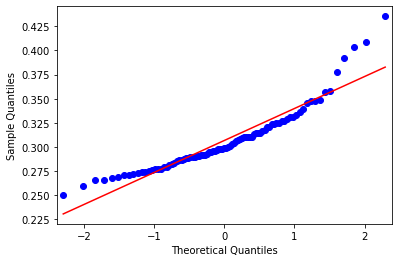

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(United_States, line='s')
pyplot.show()

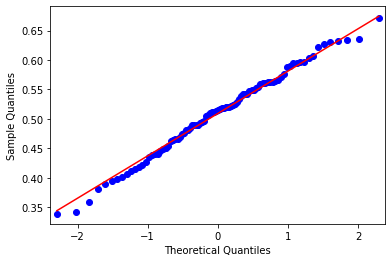

In [6]:
qqplot(India, line='s')
pyplot.show()

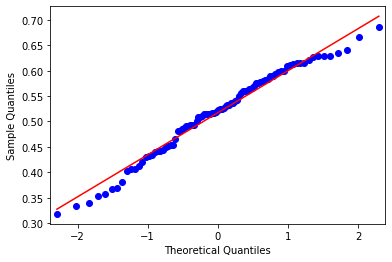

In [7]:
qqplot(United_Kingdom, line='s')
pyplot.show()

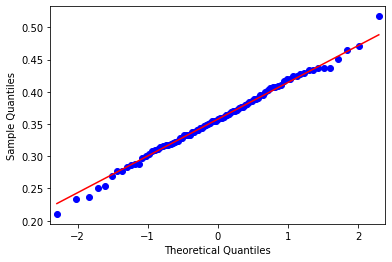

In [8]:
qqplot(Canada, line='s')
pyplot.show()

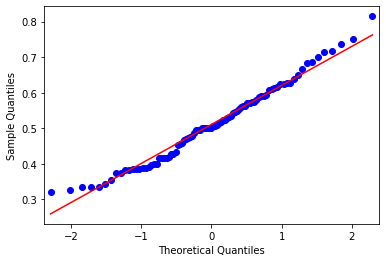

In [9]:
qqplot(France, line='s')
pyplot.show()

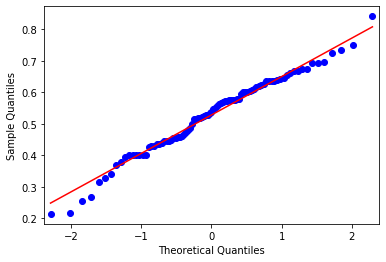

In [10]:
qqplot(Germany, line='s')
pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [11]:
names = ["United_States", "India", "United_Kingdom", "Canada", "France", "Germany"]
for index, i in enumerate((United_States, India, United_Kingdom, Canada, France, Germany)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

United_States
Statistics=0.898, p=0.000
Sample does not look Gaussian (reject H0)
India
Statistics=0.990, p=0.724
Sample looks Gaussian (fail to reject H0)
United_Kingdom
Statistics=0.977, p=0.101
Sample looks Gaussian (fail to reject H0)
Canada
Statistics=0.996, p=0.996
Sample looks Gaussian (fail to reject H0)
France
Statistics=0.978, p=0.122
Sample looks Gaussian (fail to reject H0)
Germany
Statistics=0.984, p=0.346
Sample looks Gaussian (fail to reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [12]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [13]:
stat, p = kruskal(United_States, India, United_Kingdom, Canada,France,Germany)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=301.873, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [14]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### United_States against every other Country

In [15]:

names = ["United_States", "India", "Canada", "France", "Germany"]
for index, i in enumerate((India, United_Kingdom, Canada,France,Germany)):
    stat, p = ranksums(United_States,i)
    print('United_States -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

United_States - United_States
Statistics=-11.505, p=0.000
The difference between the two datasets is significant (reject H0)
United_States - India
Statistics=-11.401, p=0.000
The difference between the two datasets is significant (reject H0)
United_States - Canada
Statistics=-6.758, p=0.000
The difference between the two datasets is significant (reject H0)
United_States - France
Statistics=-11.204, p=0.000
The difference between the two datasets is significant (reject H0)
United_States - Germany
Statistics=-10.393, p=0.000
The difference between the two datasets is significant (reject H0)


### India against every other Country

In [16]:
#Direct against every other Medium
names = ["United_Kingdom", "Canada", "France", "Germany"]
for index, i in enumerate((United_Kingdom, Canada,France,Germany)):
    stat, p = ranksums(India,i)
    print('India -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

India - United_Kingdom
Statistics=-0.926, p=0.355
The difference between the two datasets is not significant (fail to reject H0)
India - Canada
Statistics=10.416, p=0.000
The difference between the two datasets is significant (reject H0)
India - France
Statistics=0.265, p=0.791
The difference between the two datasets is not significant (fail to reject H0)
India - Germany
Statistics=-1.655, p=0.098
The difference between the two datasets is not significant (fail to reject H0)


### United_Kingdom against every other Page

In [17]:
names = ["Canada", "France", "Germany"]
for index, i in enumerate((Canada,France,Germany)):
    stat, p = ranksums(United_Kingdom,i)
    print('United_Kingdom -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

United_Kingdom - Canada
Statistics=10.101, p=0.000
The difference between the two datasets is significant (reject H0)
United_Kingdom - France
Statistics=0.868, p=0.385
The difference between the two datasets is not significant (fail to reject H0)
United_Kingdom - Germany
Statistics=-0.992, p=0.321
The difference between the two datasets is not significant (fail to reject H0)


### Canada against France and Germany

In [18]:
#Analytics_referal against Partners_affiliate and Google_cpc
names = ["France", "google_cpc",]
for index, i in enumerate((France,Germany)):
    stat, p = ranksums(Canada,i)
    print('Canada -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Canada - France
Statistics=-9.068, p=0.000
The difference between the two datasets is significant (reject H0)
Canada - google_cpc
Statistics=-9.240, p=0.000
The difference between the two datasets is significant (reject H0)


### France against Germany

In [19]:
stat, p = ranksums(France, Germany)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=-1.449, p=0.147
The difference between the two datasets is not significant (fail to reject H0)
